# Análise da Chocolura
Esse material pertence ao curso **Data Science: Introdução a análise de séries temporais** da Alura.

## Preparando o ambiente

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

sns.set(rc={'figure.figsize':(18, 12)})

## Carregando os dados

In [2]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [3]:
chocolura.shape

(24, 2)

In [4]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [5]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


## Análise gráfica

In [6]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

crescimento_mensal = np.array([np.NaN])
for index in range(1, len(chocolura.vendas)):
    mes_anterior = chocolura.vendas[index - 1]
    crescimento = 0
    if(mes_anterior != 0):
        crescimento = round(((chocolura.vendas[index] / chocolura.vendas[index - 1]) - 1), 2)
    else:
        crescimento = np.NaN
    crescimento_mensal = np.append(crescimento_mensal, crescimento)
chocolura['crescimento_mensal'] = crescimento_mensal
chocolura

,mes,vendas,aumento,aceleracao,crescimento_mensal
0,2017-01-01,210,NaN,NaN,NaN
1,2017-02-01,185,-25.0,NaN,-0.12
2,2017-03-01,209,24.0,49.0,0.13
3,2017-04-01,280,71.0,47.0,0.34
4,2017-05-01,211,-69.0,-140.0,-0.25
5,2017-06-01,300,89.0,158.0,0.42
6,2017-07-01,210,-90.0,-179.0,-0.30
7,2017-08-01,205,-5.0,85.0,-0.02
8,2017-09-01,208,3.0,8.0,0.01
9,2017-10-01,210,2.0,-1.0,0.01


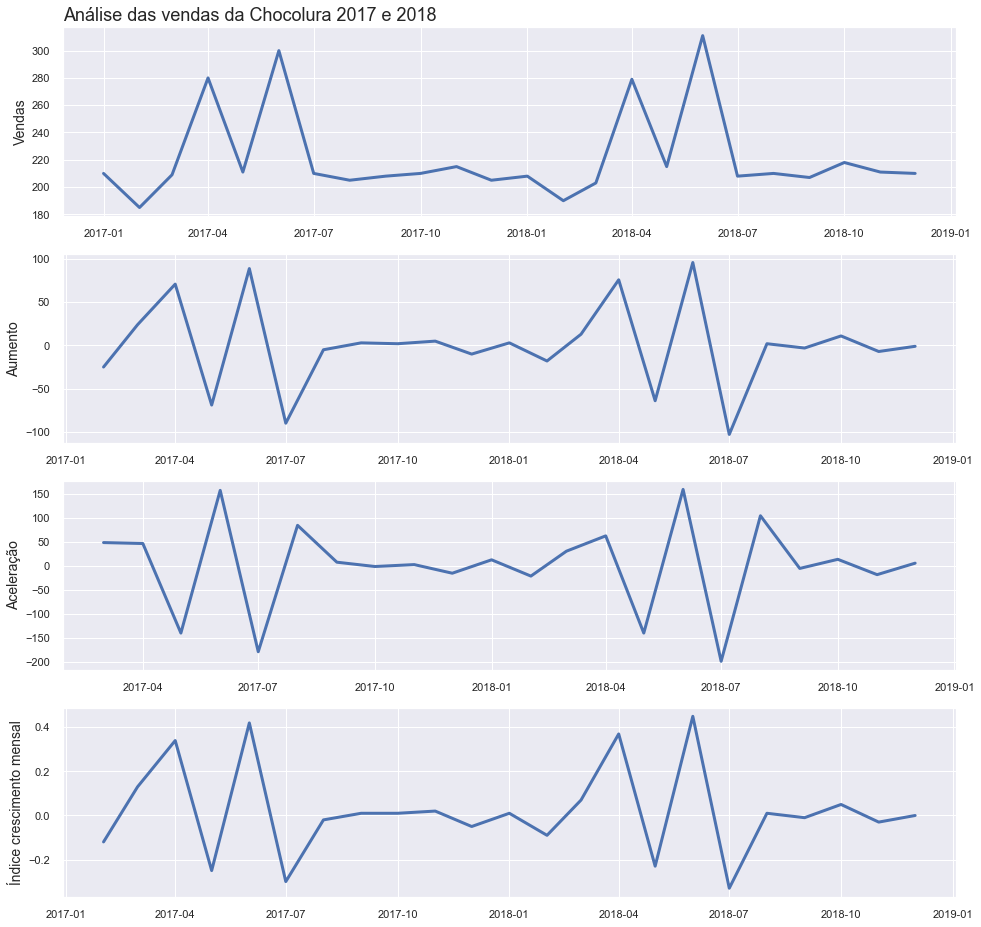

In [7]:
plt.figure(figsize=(16,16))

ax = plt.subplot(4,1,1)
ax.set_title('Análise das vendas da Chocolura 2017 e 2018',fontsize=18, loc='left')
lp_vendas = sns.lineplot(x='mes', y='vendas', data=chocolura, linewidth = 3)
lp_vendas.set_xlabel('')
lp_vendas.set_ylabel('Vendas', fontsize=14);

plt.subplot(4,1,2)
lp_aumento = sns.lineplot(x='mes', y='aumento', data=chocolura, linewidth = 3)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(4,1,3)
lp_aceleracao = sns.lineplot(x='mes', y='aceleracao', data=chocolura, linewidth = 3)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(4,1,4)
lp_crescimento_mensal = sns.lineplot(x='mes', y='crescimento_mensal', data=chocolura, linewidth = 3)
lp_crescimento_mensal.set_xlabel('')
lp_crescimento_mensal.set_ylabel('Índice crescimento mensal', fontsize=14);

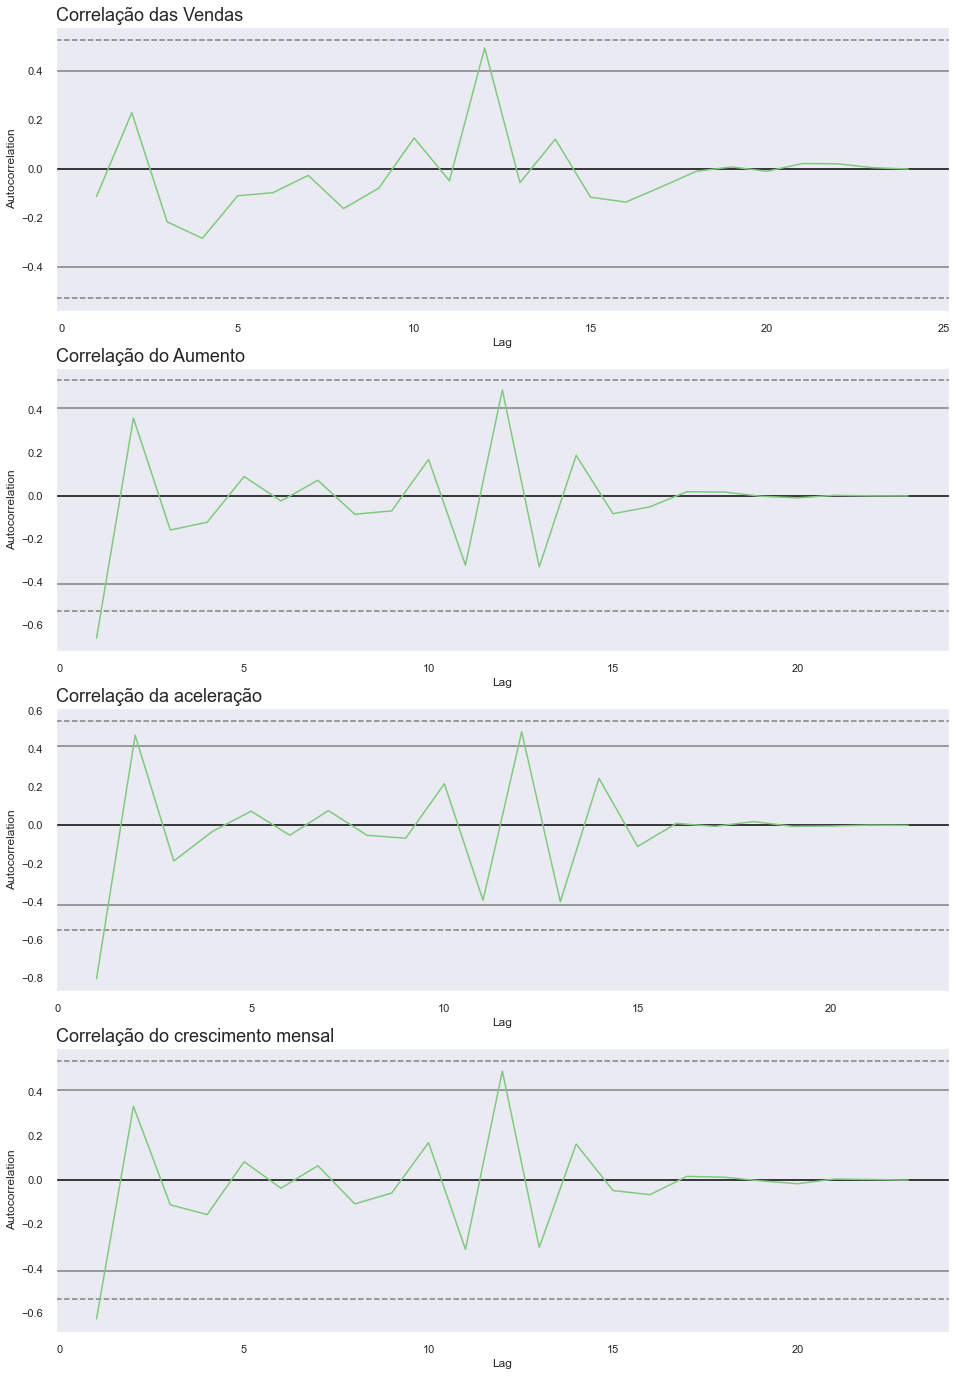

In [8]:
plt.figure(figsize=(16,24))
sns.set_palette('Accent')

ac_vendas = plt.subplot(4,1,1)
autocorrelation_plot(chocolura['vendas'], ax = ac_vendas);
ac_vendas.set_title('Correlação das Vendas', fontsize = 18, loc='left')


ac_aumento = plt.subplot(4,1,2)
autocorrelation_plot(chocolura['aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(4,1,3)
autocorrelation_plot(chocolura['aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc_mensal = plt.subplot(4,1,4)
autocorrelation_plot(chocolura['crescimento_mensal'][1:], ax = ac_cresc_mensal);
ac_cresc_mensal.set_title('Correlação do crescimento mensal', fontsize = 18, loc='left');


## Análise das vendas diárias

In [10]:
vendas_por_dia = pd. read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.sample(10)

,dia,vendas
24,2018-10-25,50
15,2018-10-16,52
11,2018-10-12,15
52,2018-11-22,55
49,2018-11-19,55
50,2018-11-20,54
20,2018-10-21,19
18,2018-10-19,53
44,2018-11-14,52
34,2018-11-04,16


In [11]:
vendas_por_dia.shape

(61, 2)

In [13]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [16]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia['dia'])

In [17]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [18]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

In [20]:
crescimento_mensal = np.array([np.NaN])
for index in range(1, len(vendas_por_dia.vendas)):
    mes_anterior = vendas_por_dia.vendas[index - 1]
    crescimento = 0
    if(mes_anterior != 0):
        crescimento = round(((vendas_por_dia.vendas[index] / vendas_por_dia.vendas[index - 1]) - 1), 2)
    else:
        crescimento = np.NaN
    crescimento_mensal = np.append(crescimento_mensal, crescimento)
vendas_por_dia['crescimento_mensal'] = crescimento_mensal
vendas_por_dia

,dia,vendas,aumento,aceleracao,crescimento_mensal
0,2018-10-01,50,NaN,NaN,NaN
1,2018-10-02,48,-2.0,NaN,-0.04
2,2018-10-03,56,8.0,10.0,0.17
3,2018-10-04,50,-6.0,-14.0,-0.11
4,2018-10-05,51,1.0,7.0,0.02
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,1.70
57,2018-11-27,60,6.0,-28.0,0.11
58,2018-11-28,49,-11.0,-17.0,-0.18
59,2018-11-29,50,1.0,12.0,0.02


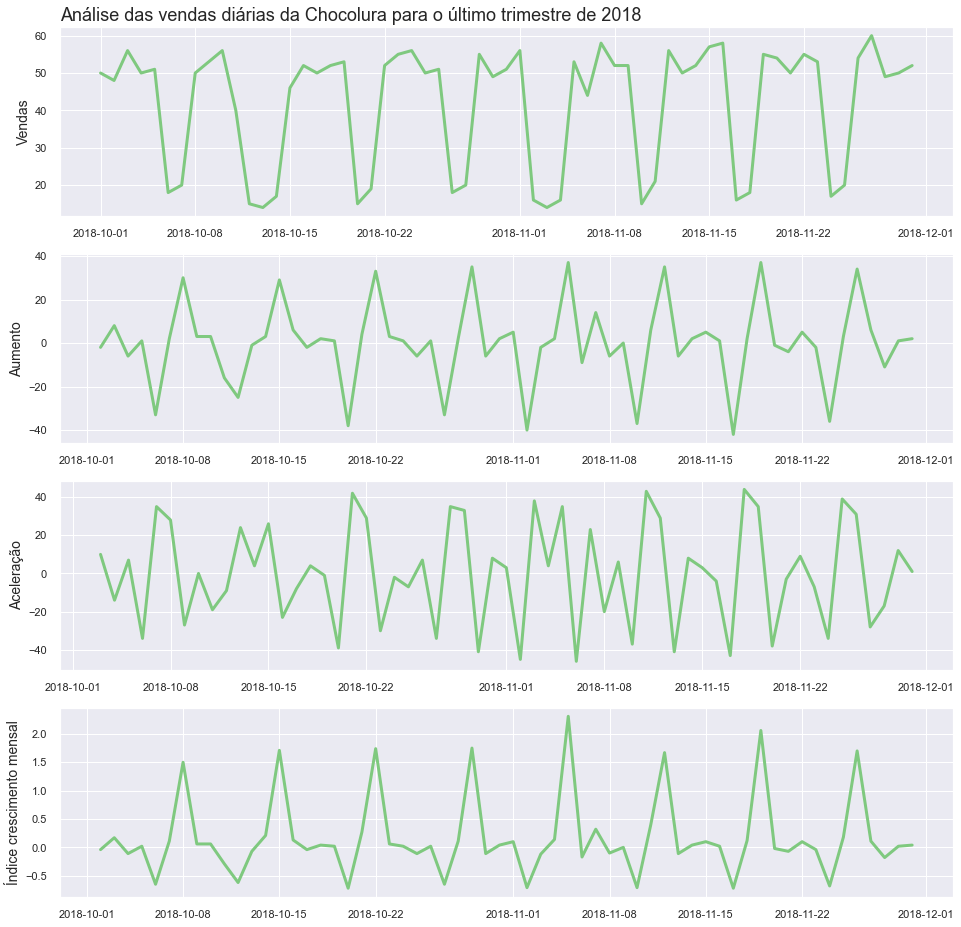

In [25]:
plt.figure(figsize=(16,16))

ax = plt.subplot(4,1,1)
ax.set_title('Análise das vendas diárias da Chocolura para o último trimestre de 2018',fontsize=18, loc='left')
lp_vendas = sns.lineplot(x='dia', y='vendas', data=vendas_por_dia, linewidth = 3)
lp_vendas.set_xlabel('')
lp_vendas.set_ylabel('Vendas', fontsize=14);

plt.subplot(4,1,2)
lp_aumento = sns.lineplot(x='dia', y='aumento', data=vendas_por_dia, linewidth = 3)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(4,1,3)
lp_aceleracao = sns.lineplot(x='dia', y='aceleracao', data=vendas_por_dia, linewidth = 3)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(4,1,4)
lp_crescimento_mensal = sns.lineplot(x='dia', y='crescimento_mensal', data=vendas_por_dia, linewidth = 3)
lp_crescimento_mensal.set_xlabel('')
lp_crescimento_mensal.set_ylabel('Índice crescimento mensal', fontsize=14);

### Analisando a sazonalidade

In [29]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
dias_traduzidos = {
    'Monday': "Segunda", 
    'Tuesday': "Terça",
    'Wednesday': "Quarta",
    'Thursday': "Quinta",
    'Friday': "Sexta",
    'Saturday': "Sábado",
    'Sunday': "Domingo"
}
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)
vendas_por_dia

,dia,vendas,aumento,aceleracao,crescimento_mensal,dia_da_semana
0,2018-10-01,50,NaN,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,-0.04,Terça
2,2018-10-03,56,8.0,10.0,0.17,Quarta
3,2018-10-04,50,-6.0,-14.0,-0.11,Quinta
4,2018-10-05,51,1.0,7.0,0.02,Sexta
...,...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,1.70,Segunda
57,2018-11-27,60,6.0,-28.0,0.11,Terça
58,2018-11-28,49,-11.0,-17.0,-0.18,Quarta
59,2018-11-29,50,1.0,12.0,0.02,Quinta


In [34]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana').mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao,crescimento_mensal
dia_da_semana,,,,
Domingo,19.0,3.0,31.0,0.0
Quarta,53.0,1.0,2.0,0.0
Quinta,51.0,-2.0,-3.0,-0.0
Segunda,52.0,34.0,31.0,2.0
Sexta,45.0,-7.0,-5.0,-0.0
Sábado,16.0,-28.0,-20.0,-1.0
Terça,52.0,-1.0,-34.0,-0.0


### Correlação das vendas diárias

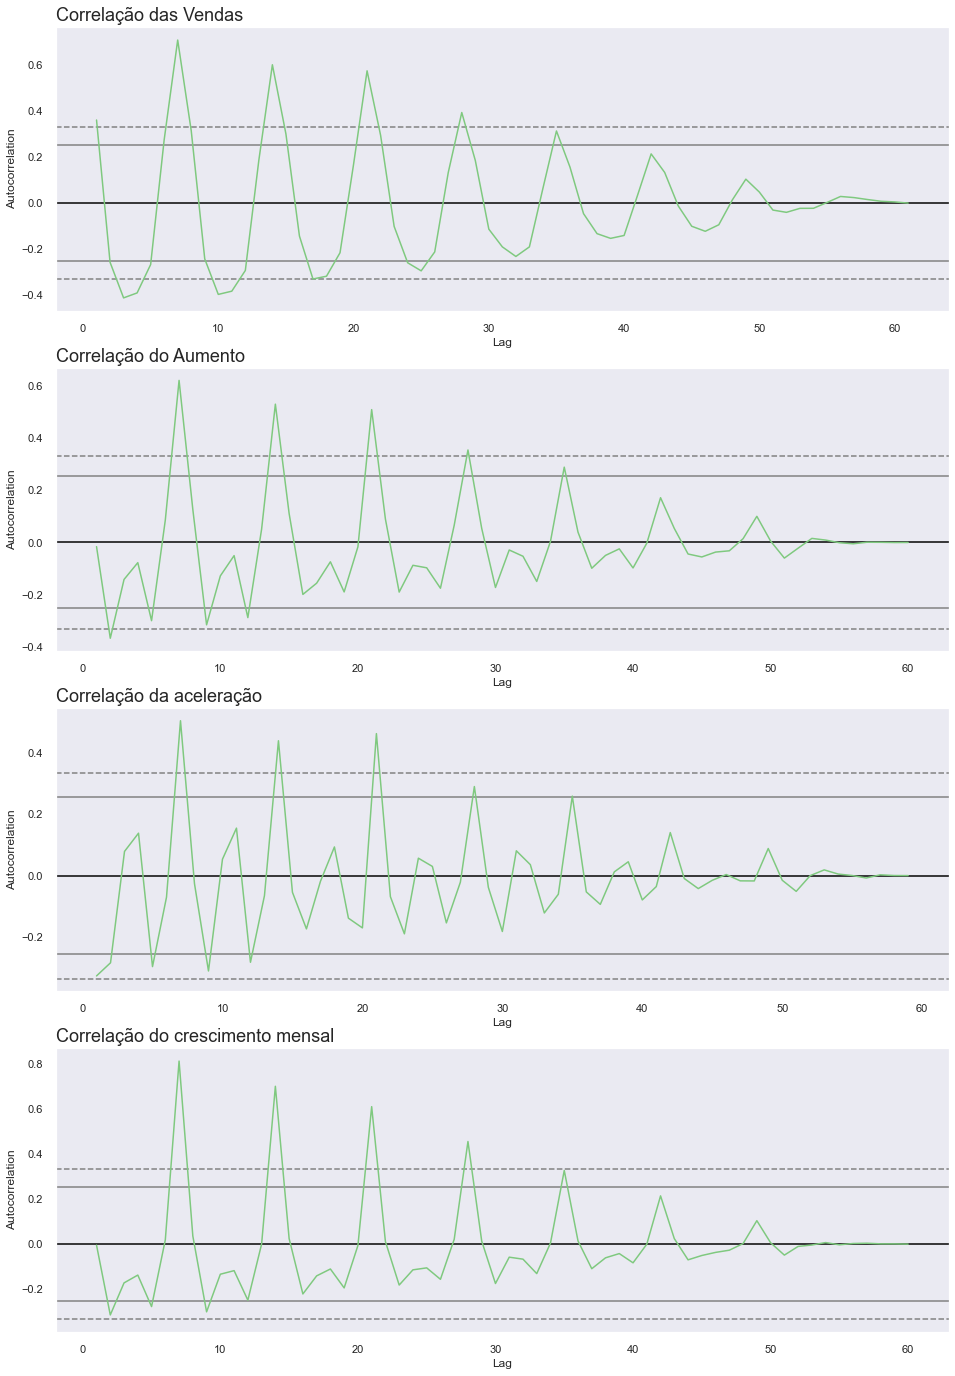

In [35]:
plt.figure(figsize=(16,24))
sns.set_palette('Accent')

ac_vendas = plt.subplot(4,1,1)
autocorrelation_plot(vendas_por_dia['vendas'], ax = ac_vendas);
ac_vendas.set_title('Correlação das Vendas', fontsize = 18, loc='left')


ac_aumento = plt.subplot(4,1,2)
autocorrelation_plot(vendas_por_dia['aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(4,1,3)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc_mensal = plt.subplot(4,1,4)
autocorrelation_plot(vendas_por_dia['crescimento_mensal'][1:], ax = ac_cresc_mensal);
ac_cresc_mensal.set_title('Correlação do crescimento mensal', fontsize = 18, loc='left');


## Statsmodel

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
chocolura

,mes,vendas,aumento,aceleracao,crescimento_mensal
0,2017-01-01,210,NaN,NaN,NaN
1,2017-02-01,185,-25.0,NaN,-0.12
2,2017-03-01,209,24.0,49.0,0.13
3,2017-04-01,280,71.0,47.0,0.34
4,2017-05-01,211,-69.0,-140.0,-0.25
5,2017-06-01,300,89.0,158.0,0.42
6,2017-07-01,210,-90.0,-179.0,-0.30
7,2017-08-01,205,-5.0,85.0,-0.02
8,2017-09-01,208,3.0,8.0,0.01
9,2017-10-01,210,2.0,-1.0,0.01


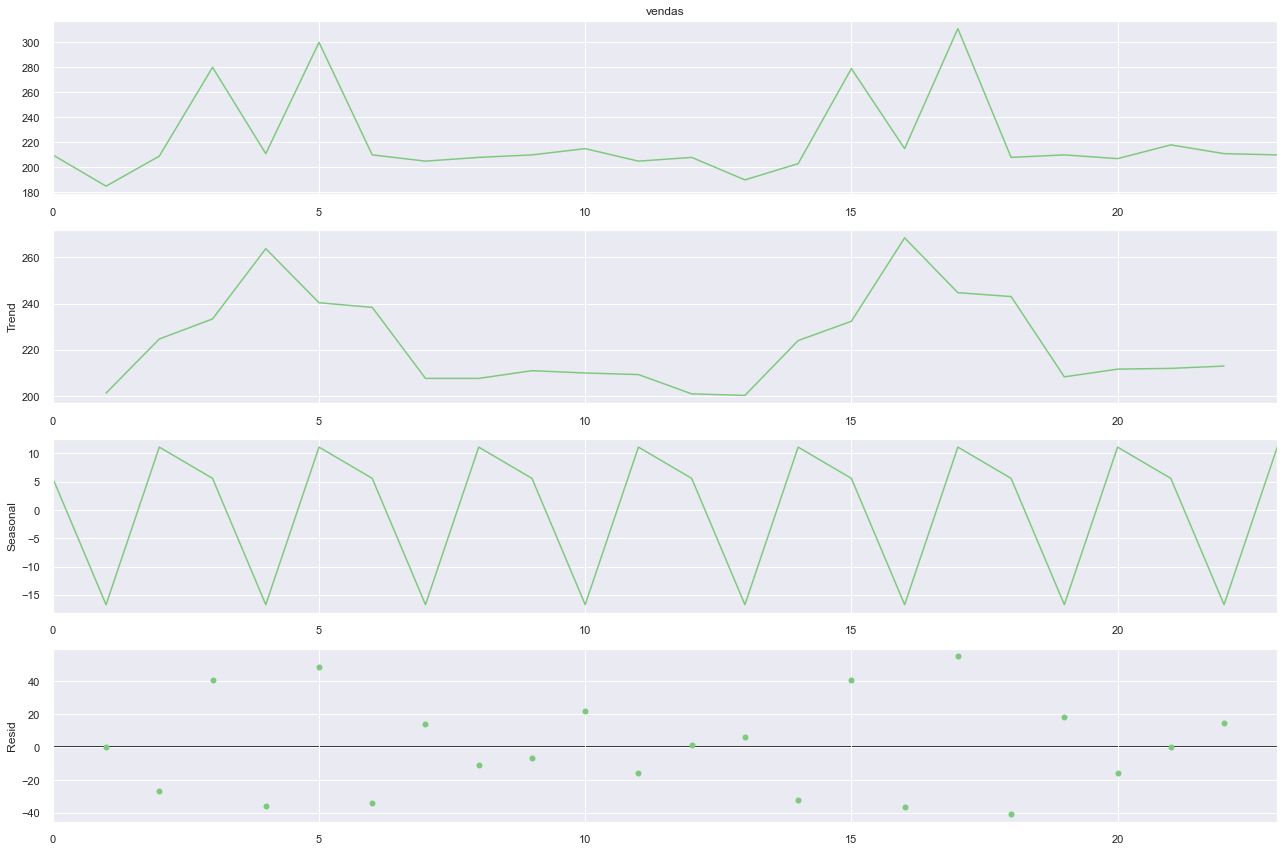

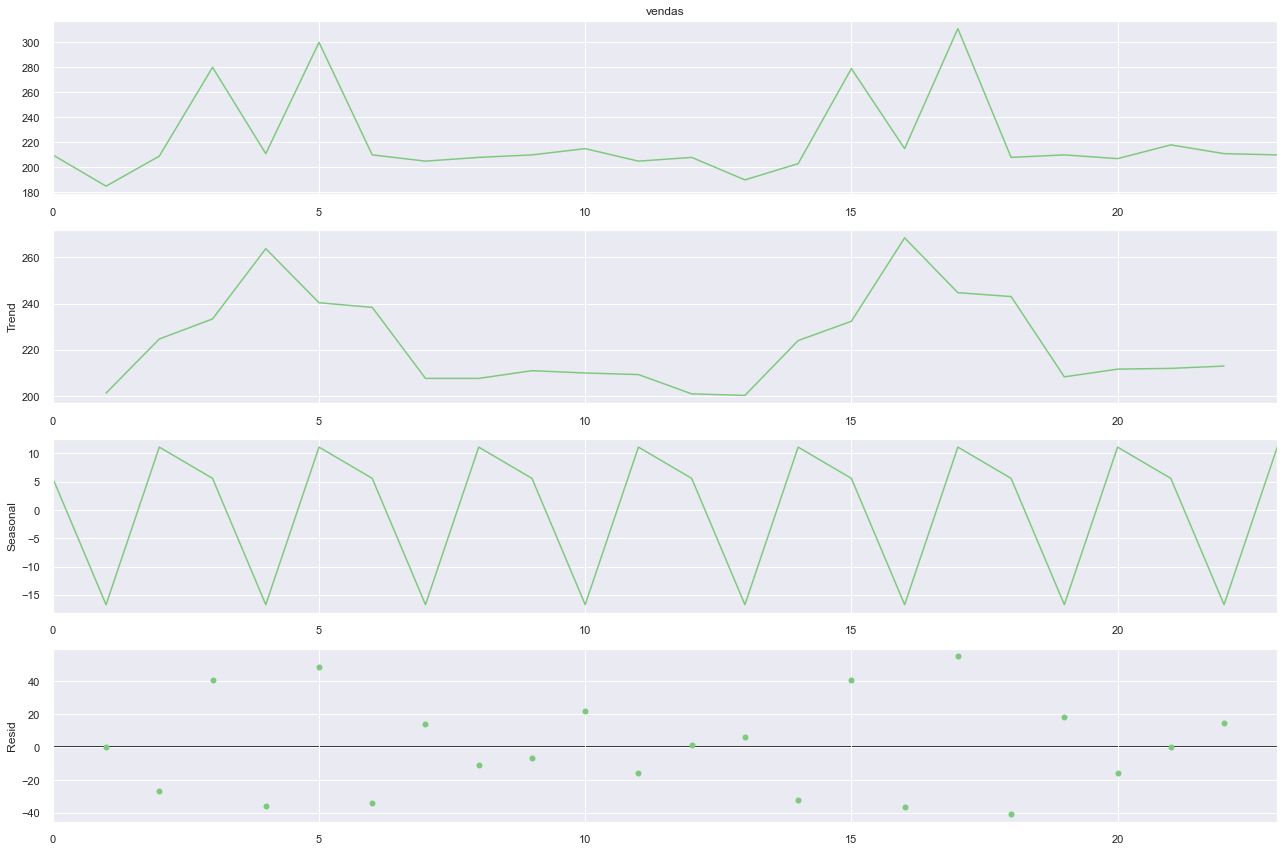

In [53]:
resultado = seasonal_decompose(chocolura['vendas'], period = 3)
resultado.plot()

In [48]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [51]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508
5,300.0,240.333333,11.126984,48.539683
6,210.0,238.333333,5.603175,-33.936508
7,205.0,207.666667,-16.730159,14.063492
8,208.0,207.666667,11.126984,-10.793651
9,210.0,211.000000,5.603175,-6.603175
